In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

delay_data = pd.read_csv('delay-pontianakbisa.csv')
delay_data.head()

,Tanggal,total curah hujan,delay
0,43221,0.0,17
1,43222,41.0,59
2,43223,0.0,28
3,43224,1.0,25
4,43225,5.6,23


In [2]:
delay_data = pd.read_csv('delay-pontianakbisa.csv', na_values=['NA'])

In [3]:
print (delay_data.dtypes)

Tanggal                int64
total curah hujan    float64
delay                  int64
dtype: object


In [4]:
delay_data.describe()

,Tanggal,total curah hujan,delay
count,335.0000,335.000000,335.00000
mean,43388.0000,15.620597,20.01194
std,96.8504,19.966712,21.56802
min,43221.0000,0.000000,0.00000
25%,43304.5000,0.050000,0.00000
50%,43388.0000,6.900000,15.00000
75%,43471.5000,24.250000,33.00000
max,43555.0000,93.600000,103.00000


In [5]:
#data placing
from sklearn.preprocessing import StandardScaler
tanggal = delay_data.iloc[:,0:1].values
total_hujan = delay_data.iloc[:,1:2].values
delay = delay_data.iloc[:,2:3].values

In [6]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

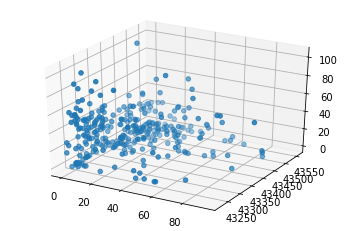

In [7]:
threed = plt.figure().gca(projection='3d')
threed.scatter(total_hujan, tanggal, delay)

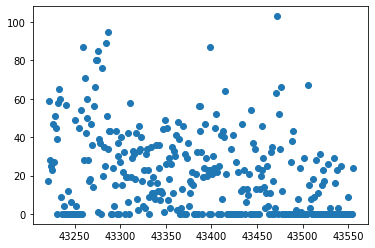

In [8]:
#threed = plt.figure().gca(projection='3d')
#threed.scatter(total_hujan, tanggal, delay)

plt.figure()
plt.scatter(tanggal, delay)

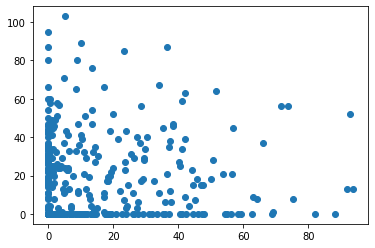

In [9]:
plt.figure()
plt.scatter(total_hujan, delay)

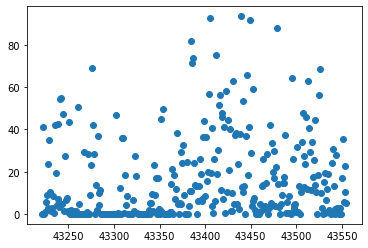

In [10]:
plt.figure()
plt.scatter(tanggal, total_hujan)

In [11]:
import numpy as np
from sklearn.svm import SVR
import matplotlib as plt
import pandas as pd

In [12]:
#model fitting

svr_lin = SVR(kernel = 'linear', C = 1)
svr_poly = SVR(kernel = 'poly', C = 1, degree = 3)
svr_rbf = SVR(kernel = 'rbf', C = 1, gamma = 0.1)
    
#linear
    
svr_lin.fit(tanggal, total_hujan)

svr_lin.score(tanggal, total_hujan)

C:\Users\mrizk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.221762088053842

In [ ]:
#polynomial

svr_poly.fit(tanggal, total_hujan)
svr_poly.score(tanggal, total_hujan)

C:\Users\mrizk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrizk\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#radial basis function

svr_rbf.fit(total_hujan, delay)
svr_rbf.score(tanggal, delay)

In [156]:
predicted_delay = svr_lin.predict(np.array([5000]).reshape(1, 1))
print(predicted_delay)

[16.30478688]


In [159]:
predicted_delay = svr_poly.predict(np.array([5000]).reshape(1, 1))
print(predicted_delay)

[21.23574067]


In [ ]:
predicted_delay = svr_rbf.predict(np.array([5000]).reshape(1, 1))
print(predicted_delay)